In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [75]:
# Load train & test
train = pd.read_csv("/Users/apple/Desktop/Machine-Learning/csv's/mnist_train.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
train.shape

(60000, 785)

In [77]:
test.shape

(10000, 785)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 130 130 225 255
  255 109   7 116 243 200   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   8  95 217 253 253 253 253
  253 253 253 253 253 248  11   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  27 213 253 2

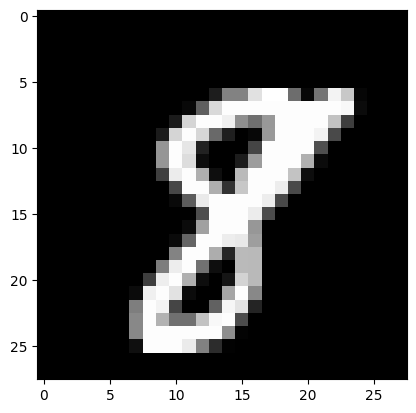

In [78]:
pixels = train.iloc[55, 1:].values.reshape(28, 28)  # reshape first row
print(pixels.shape)
print(pixels)
plt.imshow(pixels, cmap="gray")
plt.show()

#so basically data is the handwritten numbers pics in the pixels of numbers only......

In [79]:
X = train.drop(columns='label', axis=1)
y = train['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Use a smaller subset first (for faster training)
X_small = X_scaled[:20000]
y_small = y[:20000] #we did this because the data is way more huge and the compute power of our laptop is not that much even though its a map for this we need GPU's we dont have that. Thats why we get the chuck of the data
train_X, test_X, train_Y, test_Y = train_test_split(X_small, y_small,train_size=0.20, random_state=42)


In [80]:
model = SVC(max_iter=2000)
model.fit(train_X, train_Y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [81]:
y_pred = model.predict(test_X)
y_pred

array([6, 9, 3, ..., 7, 4, 4], shape=(16000,))

In [82]:
# 📊 Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))


Confusion Matrix:
 [[1559    0   13    3    4    2    5    6    3    1]
 [   0 1788   15    5    2    6    2    6   13    3]
 [   6   16 1412   20    6    0   10   42   36    1]
 [   2    9   25 1524    3   22    5   45   18    9]
 [   2    5   28    1 1422    5    9   20    2   40]
 [   8    9    8   63    4 1264   32   18   12   10]
 [  11    3   18    0    4   17 1448   43    7    0]
 [   4   10   15    5   24    0    0 1574    4   55]
 [   8   16   14   45   14   25   12   14 1347   24]
 [   7    4   10   23   34    6    1   75    8 1462]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1596
           1       0.96      0.97      0.97      1840
           2       0.91      0.91      0.91      1549
           3       0.90      0.92      0.91      1662
           4       0.94      0.93      0.93      1534
           5       0.94      0.89      0.91      1428
           6       0.95      0.93      0.94  

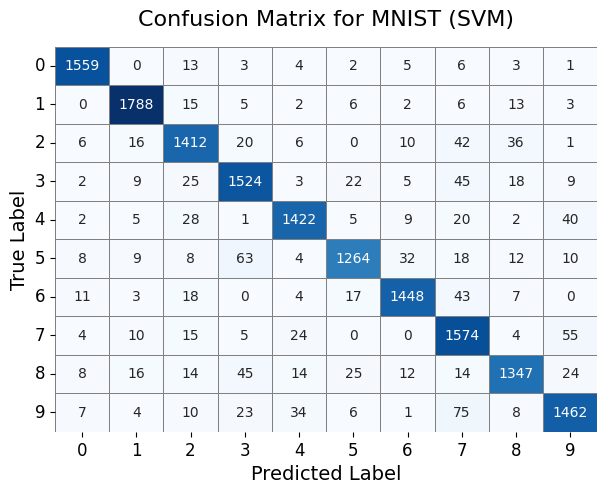

In [83]:
cm = confusion_matrix(test_Y, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=range(10), yticklabels=range(10),
            linewidths=0.5, linecolor='gray')

plt.title("Confusion Matrix for MNIST (SVM)", fontsize=16, pad=15)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()

For now we we train the data on the small portion of the data thats why the accuracy isnt that good but when we train it to the all of the data and then train. The accuracy will surely be increase, or we can reduce the dimension of the data from 725 or something to the 100 and 150 using pca

In [85]:
#Now lets save this model
import joblib

joblib.dump(model, "/Users/apple/Desktop/Machine-Learning/saved-models/handwritten_numbers_classification_model.pkl")


['/Users/apple/Desktop/Machine-Learning/saved-models/handwritten_numbers_classification_model.pkl']